In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os, os.path
import pathlib

In [2]:
img_height = 256
img_width = 256
batch_size = 32

In [3]:
data_dir = "dataset"
data_dir = pathlib.Path(data_dir)

#load images and split train and test sets
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 42,
  image_size = (img_height, img_width),
  batch_size = batch_size)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 42,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 30000 files belonging to 2 classes.
Using 24000 files for training.
Found 30000 files belonging to 2 classes.
Using 6000 files for validation.


In [4]:
np.array(train_set.class_names)

array(['Photo', 'notPhotos'], dtype='<U9')

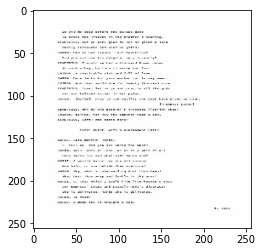

In [5]:
#show exemple of an image
images, labels = next(iter(test_set.take(1)))
plt.imshow(images[0].numpy().astype("uint8"))

In [6]:
#shuffle the train set
#add caching and prefeching optimisations
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
print("done")

done


In [ ]:
class_names = ['Photos', 'notPhotos']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
print("i'm fine here")
for images, labels in train_set.take(1):
    print("take is loooooong")
    for i in range(9):
        print("why is this long ?")
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8")) #a compl
        plt.title(class_names[labels[i]])
        plt.axis("off")

i'm fine here


## Modèle

In [ ]:
#retourne tt le temps que non
from sklearn.base import BaseEstimator
class AlwaysPhotoClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.ones((len(X),1), dtype=bool)
    
model_naive = AlwaysPhotoClassifier()

In [ ]:
#try full dense nn pour comparer

In [ ]:
model_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model_dense.summary()

In [ ]:
model_dense.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn_1.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model_cnn_1 = models.Sequential()
#norma 
model_cnn_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model_cnn_1.add(layers.MaxPooling2D((2, 2)))
model_cnn_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_1.add(layers.MaxPooling2D((2, 2)))
model_cnn_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn_1.add(layers.Flatten())
model_cnn_1.add(layers.Dense(64, activation='relu'))
model_cnn_1.add(layers.Dense(10))

In [ ]:
model_cnn_1.summary()

In [ ]:
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn_1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cnn_1.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
#on peut faire un tableau comparatif des modèles

In [ ]:
#pas hésiter a ref les papier qui montrenet que tel modèle marche le mieux (et coup de bol c'est le notre)

In [ ]:
#grille d'éval : 1 implé (bon params et explication adaptée),2 description de l'archi et visualisation des résultats : dessin de l'archi,graph de compa pour chaque modèle et commentaire. on a sans rien, aved dropout et avec data augment. 3 conclue : points forts et faibles et piste d'amélio (style transfer learning)